# 课时7 卷积去噪自编码器

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'1.13.1'

## 1. 导入MNIST数据集

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('E:\SoftWare_Installing\Pycharm\Pycharm WorkPlace\GAN生成对抗网络入门与实战\data\MNIST', one_hot=False)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting E:\SoftWare_Installing\Pycharm\Pycharm WorkPlace\GAN生成对抗网络入门与实战\data\MNIST\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting E:\SoftWare_Installing\Pycharm\Pycharm WorkPlace\GAN生成对抗网络入门与实战\data\MNIST\train-labels-idx1-ubyte.gz
Extracting E:\SoftWare_Installing\Pycharm\Pycharm WorkPlace\GAN生成对抗网络入门与实战\data\MNIST\t10k-images-idx3-ubyte.gz
Extracting E:\SoftWare_Installing\Pycharm\Pycharm WorkPlace\GAN生成对抗网络入门与实战\data\MNIST\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


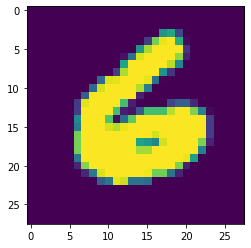

In [3]:
# 选取其中的一张图片进行展示
img = mnist.train.images[18]
plt.imshow(img.reshape((28,28)))

In [4]:
mnist.train.images.shape

(55000, 784)

In [5]:
inputs = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28, 1], name='inputs')
targets = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28, 1], name='targets')

In [6]:
# 卷积自编码器的encoding层
conv_1 = tf.layers.conv2d(inputs=inputs, filters=32, kernel_size=(3, 3), padding='same', activation=tf.nn.relu)
conv_1 = tf.layers.max_pooling2d(inputs=conv_1, pool_size=(2, 2), strides=(2, 2), padding='same')

conv_2 = tf.layers.conv2d(inputs=conv_1, filters=64, kernel_size=(3, 3), padding='same', activation=tf.nn.relu)
conv_2 = tf.layers.max_pooling2d(inputs=conv_2, pool_size=(2, 2), strides=(2, 2), padding='same')

conv_3 = tf.layers.conv2d(inputs=conv_2, filters=64, kernel_size=(3, 3), padding='same', activation=tf.nn.relu)
conv_3 = tf.layers.max_pooling2d(inputs=conv_3, pool_size=(2, 2), strides=(2, 2), padding='same')

Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.max_pooling2d instead.


In [7]:
conv_3.get_shape()

TensorShape([Dimension(None), Dimension(4), Dimension(4), Dimension(64)])

In [8]:
conv_4 = tf.layers.conv2d_transpose(inputs=conv_3, filters=32, kernel_size=(4,4), 
                                    strides=(1,1),padding='valid')

conv_4.get_shape()                      

Instructions for updating:
Use keras.layers.conv2d_transpose instead.


TensorShape([Dimension(None), Dimension(7), Dimension(7), Dimension(32)])

In [9]:
conv_5 = tf.layers.conv2d_transpose(inputs=conv_4, filters=16, kernel_size=(2,2), 
                                    strides=(2, 2),padding='same')
conv_6 = tf.layers.conv2d_transpose(inputs=conv_5, filters=1, kernel_size=(2,2), 
                                    strides=(2, 2),padding='same')
conv_6.get_shape()

TensorShape([Dimension(None), Dimension(28), Dimension(28), Dimension(1)])

In [10]:
loss = tf.reduce_sum(tf.square(targets - conv_6))

In [11]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

In [13]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [14]:
epochs = 50
batch_size = 128
scale = 0.6

In [15]:
for i in range(epochs):
    epoch_loss = []
    for x in range(mnist.train.num_examples // batch_size):
        batch = mnist.train.next_batch(batch_size=batch_size)
        imgs = batch[0].reshape((-1, 28, 28, 1))
        batch_loss, _ = sess.run([loss, optimizer],
                                 feed_dict={inputs:imgs + 
                                            scale*np.random.normal(size=imgs.shape),
                                            targets:imgs})
        epoch_loss.append(batch_loss)
    print('Epoch is %i'%(i+1), 'Training Loss is %.3f'%(sum(epoch_loss)/len(epoch_loss)))

KeyboardInterrupt: 

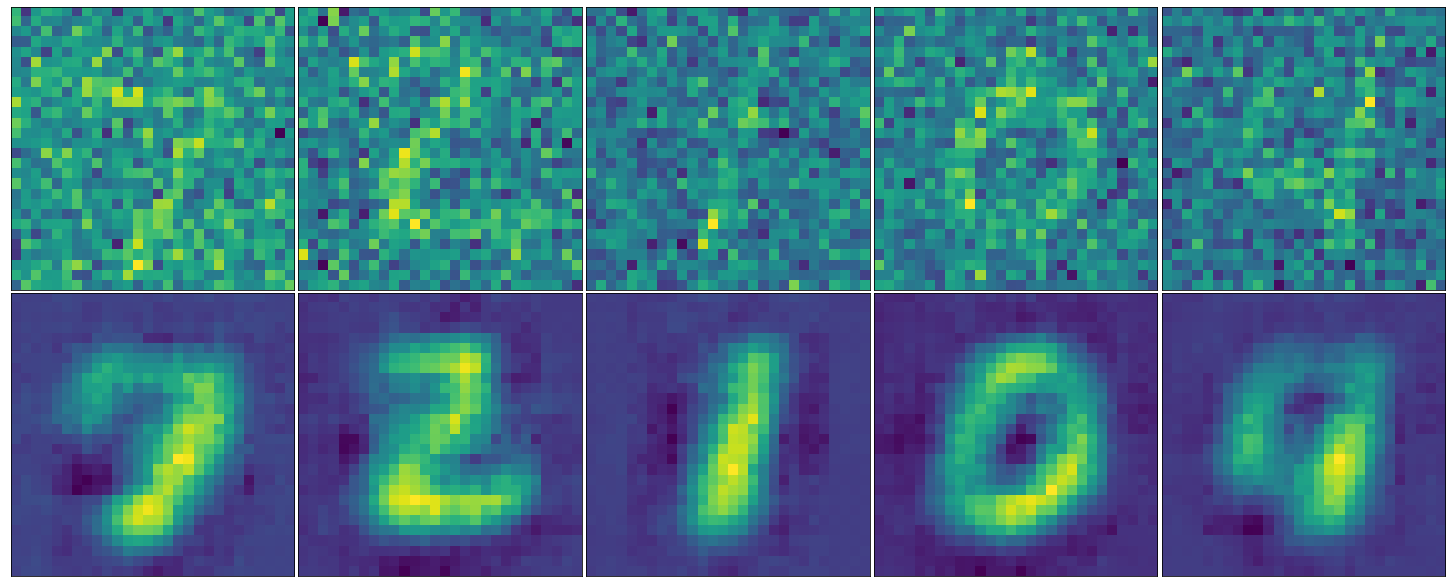

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(20, 8))
test_imgs = mnist.test.images[:5].reshape((-1, 28, 28, 1))
reconstructed = sess.run(conv_6, feed_dict={inputs:test_imgs})
test_imgs_with_noise = test_imgs + scale*np.random.normal(size=test_imgs.shape)
for image, row in zip([test_imgs_with_noise, reconstructed], ax):
    for img, ax in zip(image, row):
        ax.imshow(img.reshape((28, 28)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
fig.tight_layout(pad=0.1)